In [1]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam

print(tf.__version__)

2.17.0


In [3]:
import numpy as np

## 데이터 저장하기/생성하기

In [ ]:
#loadtxt()이용해서 diabetes.csv 파일을 읽어오기

In [9]:
loaded_data=np.loadtxt('diabetes.csv',delimiter=',')

In [ ]:
# training data / test data 분리하기

In [33]:
seperation_rate=0.3
test_data_num=int(len(loaded_data)*seperation_rate)

In [41]:
np.random.shuffle(loaded_data) #데이터를 랜덤하게 섞는 함수

In [45]:
# train, test data set 
x_data = loaded_data[:,0:-1] #모든행에서, 첫번째부터 마지막 전 열직전까지 출력
t_data = loaded_data[:,[-1]] #모든행에서, 마지막 열만 선택

In [47]:
print(x_data.shape) #모델의 입력값. 각 행은 하나의 샘플,각 열은 특성값. 8개의 특성을 가진 759의 샘플
print(t_data.shape) #모델의 목표값. 

(759, 8)
(759, 1)


## keras 모델 구축/컴파일 

In [64]:
# Logistic Regression 을 keras 이용하여 생성
model = Sequential()
# 노드 1개인 출력층 생성
model.add(Dense(t_data.shape[1],input_shape=(x_data.shape[1],),activation='sigmoid'))
# dense 뒤에는 출력층의 뉴런갯수를 결정함. test data 목표레이블을 나타내고 있기 때문에 test_data의 출력값이 필요함

In [66]:
# 학습을 위한 optimizer, 손실함수 loss 정의

model.compile(optimizer=SGD(learning_rate=0.01), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [68]:
# 모델 학습
hist=model.fit(x_data,t_data,epochs=500, validation_split=0.2,verbose=2) 
#training data로부터 20% 비율로 validation data생성후, over fitting 확인

Epoch 1/500
19/19 - 0s - 11ms/step - accuracy: 0.6227 - loss: 0.6933 - val_accuracy: 0.6118 - val_loss: 0.7042
Epoch 2/500
19/19 - 0s - 888us/step - accuracy: 0.6277 - loss: 0.6910 - val_accuracy: 0.6316 - val_loss: 0.7022
Epoch 3/500
19/19 - 0s - 943us/step - accuracy: 0.6293 - loss: 0.6887 - val_accuracy: 0.6316 - val_loss: 0.7002
Epoch 4/500
19/19 - 0s - 976us/step - accuracy: 0.6310 - loss: 0.6865 - val_accuracy: 0.6316 - val_loss: 0.6983
Epoch 5/500
19/19 - 0s - 942us/step - accuracy: 0.6310 - loss: 0.6845 - val_accuracy: 0.6316 - val_loss: 0.6964
Epoch 6/500
19/19 - 0s - 909us/step - accuracy: 0.6343 - loss: 0.6824 - val_accuracy: 0.6382 - val_loss: 0.6945
Epoch 7/500
19/19 - 0s - 877us/step - accuracy: 0.6376 - loss: 0.6804 - val_accuracy: 0.6382 - val_loss: 0.6927
Epoch 8/500
19/19 - 0s - 898us/step - accuracy: 0.6376 - loss: 0.6784 - val_accuracy: 0.6382 - val_loss: 0.6909
Epoch 9/500
19/19 - 0s - 895us/step - accuracy: 0.6359 - loss: 0.6765 - val_accuracy: 0.6382 - val_loss: 

## 모델 정확도 평가

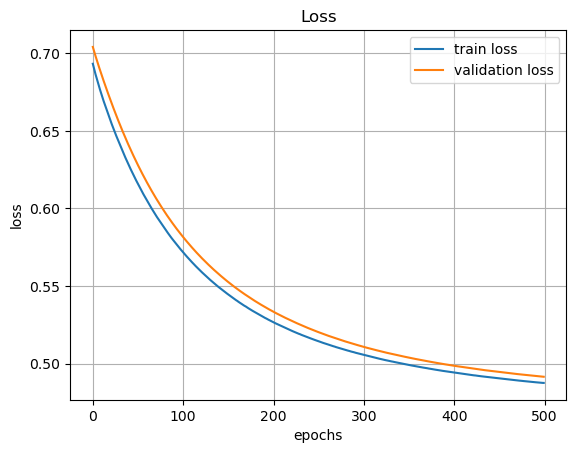

In [73]:
import matplotlib.pyplot as plt

plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'],label='train loss')
plt.plot(hist.history['val_loss'],label='validation loss')

plt.legend(loc='best')

plt.show()

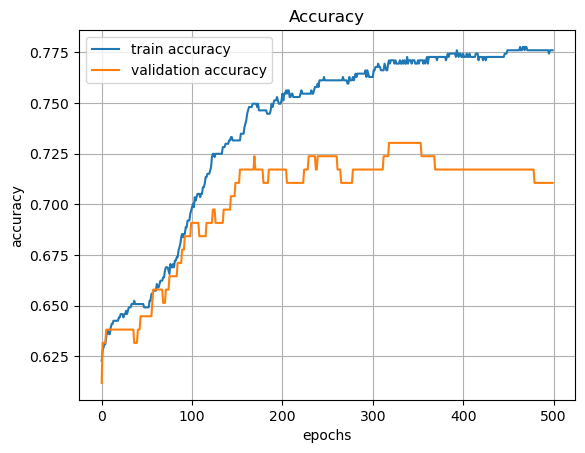

In [75]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'],label='train accuracy')
plt.plot(hist.history['val_accuracy'],label='validation accuracy')

plt.legend(loc='best')
plt.show()